In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

In [2]:
import sys
sys.path.append('../code/')

In [3]:
!pwd

/Users/janet/Machine_Learning_CSE_546/HW2/notebooks


In [4]:
from logistic_regression import LogisticRegression
from logistic_regression_batch import LogisticRegressionBatch
from hyperparameter_explorer import HyperparameterExplorer

In [5]:
from mnist_helpers import mnist_training, mnist_testing

In [6]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

In [7]:
train_X, train_y = mnist_training(shuffled=True)
test_X, test_y = mnist_testing(shuffled=True)

[    0     1     2 ..., 59997 59998 59999]
[   0    1    2 ..., 9997 9998 9999]


In [8]:
hyper_explorer_sgd = HyperparameterExplorer(X=train_X, y=train_y, 
                                        model=LogisticRegression, 
                                        validation_split=0.1, 
                                        score_name = '-(log loss)/N, training', 
                                        use_prev_best_weights=True,
                                        test_X=test_X, test_y=test_y)  # need test_X, test_y for loss w/ fit plot

6000 of 60000 points from training are reserved for validation
variances of all training data: 8.347744528888889
variances of split-off training & validation data: 8.339031241426612, 8.425954555555558


.........0.483632408768
..........0.458715956351
..........0.452085494371
..........0.449190734165
..........0.447780723644
..........0.447119600004
..........0.44688759702
..Loss optimized.  Old/N: 0.4468809456443384, new/N:0.44687678814466. Eta: 0.012309149097933273
final normalized training -(log loss): 0.44687678814466
-(log loss)/N, training:0.44687678814466


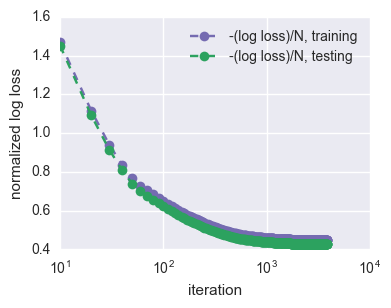

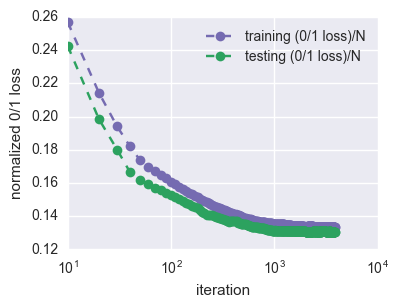

In [9]:
eta0=0.1
batchs = 1000
hyper_explorer_sgd.train_model(lam=0, eta0=eta0, max_iter=10**3, #10**2, 
                               batch_size=batchs, progress_monitoring_freq=batchs*10,
                               delta_percent=.001, verbose=True)

In [10]:
hyper_explorer_sgd.train_on_whole_training_set()

getting best model.
{'iteration': [3834], 'log loss': [-24131.346559811638], 'batch size': [1000], 'lambda': [0], 'training (0/1 loss)/N': [0.13342592592592592], 'training 0/1 loss': [7205], '-(log loss), training': [24131.346559811638], '-(log loss)/N, training': [0.44687678814465998], '# of passes through N pts': [71], 'weights': [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])], 'eta': [0.012309149097933273], 'eta0': [0.1], 'lambda normalized': [0.0], '# nonzero weights': [261]}
.........0.396629050801
..........0.39301178977
.......Loss optimized.  Old/N: 0.39269961077780474, new/N:0.392699352272627. Eta: 0.02
final normalized training -(log loss): 0.392699352272627


In [ ]:
hyper_explorer_sgd.e()

In [ ]:
eta0=0.1
batchs = 1000
hyper_explorer_sgd.train_model(lam=1, eta0=eta0, max_iter=8*10**3, #10**2, 
                               batch_size=batchs, progress_monitoring_freq=batchs*10,
                               delta_percent=.001, verbose=False)

In [ ]:
eta0=0.1
batchs = 1000
hyper_explorer_sgd.train_model(lam=2, eta0=eta0, max_iter=5*10**3, #10**2, 
                               batch_size=batchs, progress_monitoring_freq=batchs*10,
                               delta_percent=.001, verbose=False)

In [ ]:
eta0=0.1
batchs = 1000
hyper_explorer_sgd.train_model(lam=3, eta0=eta0, max_iter=5*10**3, #10**2, 
                               batch_size=batchs, progress_monitoring_freq=batchs*10,
                               delta_percent=.001, verbose=False)

In [ ]:
eta0=0.1
batchs = 1000
hyper_explorer_sgd.train_model(lam=5, eta0=eta0, max_iter=5*10**3, #10**2, 
                               batch_size=batchs, progress_monitoring_freq=batchs*10,
                               delta_percent=.001, verbose=False)

In [ ]:
eta0=0.1
batchs = 1000
hyper_explorer_sgd.train_model(lam=10, eta0=eta0, max_iter=5*10**3, #10**2, 
                               batch_size=batchs, progress_monitoring_freq=batchs*10,
                               delta_percent=.001, verbose=False)

In [ ]:
 hyper_explorer_sgd.plot_best_fits(logx=False)

In [ ]:
    hyper_explorer_sgd.models[1].plot_test_and_train_log_loss_during_fitting()

In [ ]:
10**5

In [ ]:
hyper_explorer_sgd.summary.tail(3)

In [ ]:
hyper_explorer_sgd.best('model').results.tail(3)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = hyper_explorer_sgd.best('model').results
print(plot_data.columns)
xval = '# of passes through N pts'
colors=['b', 'g']
plt.plot(plot_data[xval], plot_data['-(log loss)/N, training'], linestyle='--', marker='o', color=colors[0])
plt.plot(plot_data[xval], plot_data['-(log loss)/N, testing'], linestyle='--', marker='o', color=colors[1])
plt.legend(loc='best')
plt.xlabel(xval)
plt.ylabel('-(log loss)/N')
ax.axhline(y=0, color='k')
plt.tight_layout()
#fig.savefig("161031_Q-2-1_norm_log_loss_during_fit--no_starting_weights.pdf")

In [ ]:
hyper_explorer_sgd.train_on_whole_training_set(max_iter=10**3)

In [ ]:
hyper_explorer_sgd.evaluate_test_data()